In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
df = pd.read_csv  ('archive/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [2]:
df1 = df.head(100)
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37


In [3]:
import numpy as np
X[np.isnan(X)] = 0
X

NameError: name 'X' is not defined

In [4]:
df1.drop(columns=['Rank','Name','Platform','Genre','Publisher'],axis = 1)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006.0,41.49,29.02,3.77,8.46,82.74
1,1985.0,29.08,3.58,6.81,0.77,40.24
2,2008.0,15.85,12.88,3.79,3.31,35.82
3,2009.0,15.75,11.01,3.28,2.96,33.00
4,1996.0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
95,1997.0,3.78,2.17,1.31,0.31,7.58
96,1988.0,5.39,1.18,0.70,0.19,7.46
97,2014.0,3.24,1.35,2.42,0.43,7.45
98,2008.0,4.79,1.90,0.00,0.69,7.37


In [5]:
X = scale(df1.drop(columns=['Rank','Name','Platform','Genre','Publisher'],axis = 1))
y = pd.DataFrame(df1.Global_Sales)

X[0:6,]

array([[ 0.120457  ,  5.89345638,  7.10180902,  0.84568881,  4.60425192,
         6.89039134],
       [-2.57060365,  3.76983323, -0.17933832,  2.33709963, -0.35307237,
         2.59149568],
       [ 0.37674849,  1.5058901 ,  2.48240186,  0.85550072,  1.28432733,
         2.14441053],
       [ 0.50489424,  1.4887779 ,  1.94719174,  0.60529693,  1.05870139,
         1.85916616],
       [-1.16100045,  0.72215166,  1.34042946,  4.01003085, -0.20480389,
         1.69429087],
       [-2.05802067,  2.76363628, -0.5571337 ,  1.06645686, -0.47555502,
         1.58201383]])

In [6]:
import numpy as np
X[np.isnan(X)] = 0
X

array([[ 1.20457000e-01,  5.89345638e+00,  7.10180902e+00,
         8.45688809e-01,  4.60425192e+00,  6.89039134e+00],
       [-2.57060365e+00,  3.76983323e+00, -1.79338322e-01,
         2.33709963e+00, -3.53072368e-01,  2.59149568e+00],
       [ 3.76748490e-01,  1.50589010e+00,  2.48240186e+00,
         8.55500722e-01,  1.28432733e+00,  2.14441053e+00],
       [ 5.04894235e-01,  1.48877790e+00,  1.94719174e+00,
         6.05296933e-01,  1.05870139e+00,  1.85916616e+00],
       [-1.16100045e+00,  7.22151657e-01,  1.34042946e+00,
         4.01003085e+00, -2.04803891e-01,  1.69429087e+00],
       [-2.05802067e+00,  2.76363628e+00, -5.57133703e-01,
         1.06645686e+00, -4.75555023e-01,  1.58201383e+00],
       [ 1.20457000e-01,  7.40975069e-01,  1.43774039e+00,
         2.18501498e+00,  1.02002265e+00,  1.55672621e+00],
       [ 1.20457000e-01,  1.19444818e+00,  1.42915413e+00,
         4.33588450e-01,  9.87790377e-01,  1.45658723e+00],
       [ 5.04894235e-01,  1.29027646e+00,  8.166

In [7]:
clustering = KMeans(n_clusters = 3, random_state = 5)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

Text(0.5, 1.0, 'Sales')

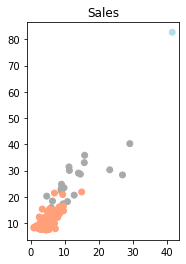

In [8]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])
plt.subplot(1,2,1)
plt.scatter(x = df1.NA_Sales, y=df1.Global_Sales, c=color_theme[clustering.labels_])
plt.title("Sales")